In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.set_printoptions(precision=6)

In [4]:
print(f"PyTorch version: {torch.__version__}")
print(f"Numpy version: {np.__version__}")

PyTorch version: 2.1.2+cu118
Numpy version: 1.24.1


In [5]:
# Set the hyperparameters for data creation
NUM_CLASSES = 2
NUM_FEATURES = 3
RANDOM_SEED = 47

# 1. Create multi-class data
X, y = make_blobs(n_samples=2000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.8, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)


In [6]:
X.shape, y.shape

((2000, 3), (2000,))

In [7]:

def get_scaled_feature(X: np.array):
    m = np.mean(X, axis=0)
    s = np.std(X, axis=0)
    
    return (X - m) / s

In [8]:
X = get_scaled_feature(X)

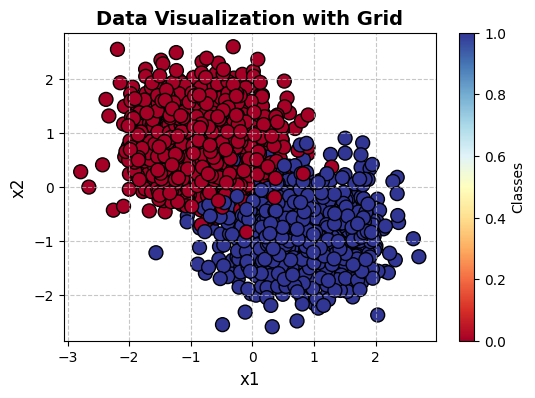

In [9]:
# let's plot the data
plt.figure(figsize=(6, 4))

# scatter plot with labels and grid
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=100)

# add title, labels, and grid
plt.title('Data Visualization with Grid', fontsize=14, fontweight='bold')
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# display color bar to indicate classes
plt.colorbar(label='Classes')

# display the plot
plt.show()

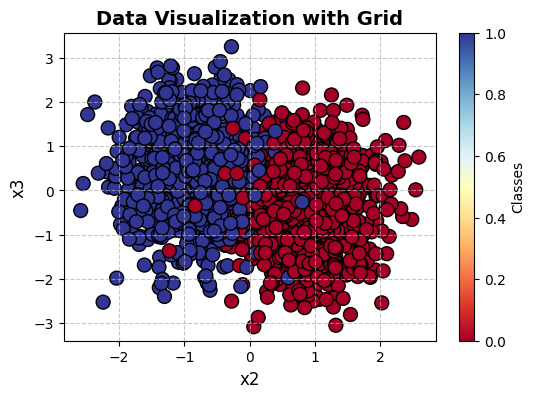

In [10]:
# let's plot the data
plt.figure(figsize=(6, 4))

# scatter plot with labels and grid
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=100)

# add title, labels, and grid
plt.title('Data Visualization with Grid', fontsize=14, fontweight='bold')
plt.xlabel('x2', fontsize=12)
plt.ylabel('x3', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# display color bar to indicate classes
plt.colorbar(label='Classes')

# display the plot
plt.show()

In [11]:
y

array([1, 1, 0, ..., 1, 1, 0])

In [12]:
X.shape, y.shape

((2000, 3), (2000,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=47
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600, 3), (1600,), (400, 3), (400,))

In [14]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [15]:
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3, 1600), (1, 1600), (3, 400), (1, 400))

In [17]:
np.sum(y_train, axis=1, keepdims=True)

array([[783]])

In [18]:
torch.rand(X_train.shape[0], 1)

tensor([[0.0781],
        [0.4395],
        [0.1539]])

In [19]:
torch.rand(1)

tensor([0.6781])

In [20]:
# let's get access the gpu 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
# let's convert all the numpy data array to the torch tensor
X_train = torch.from_numpy(X_train).float()
X_train


tensor([[-1.6899, -0.4465, -0.6797,  ..., -0.2090, -1.1993,  0.8357],
        [ 0.3334,  0.8800,  0.6528,  ...,  1.2049,  0.1664, -0.9908],
        [-1.8689, -0.1811,  0.2388,  ...,  0.2600, -1.4166, -0.4077]])

In [22]:
# let's convert all the numpy data array to the torch tensor
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [23]:
y_train

tensor([[0, 0, 0,  ..., 0, 0, 1]], dtype=torch.int32)

In [24]:
X_test

tensor([[-1.0727, -0.1617, -0.7145,  ..., -0.5124, -0.8416,  0.6920],
        [ 1.4575,  2.0803,  1.3035,  ..., -0.8717,  0.6007, -0.1716],
        [-0.1392,  1.1335, -0.9088,  ...,  1.2746, -0.2702,  0.1745]])

In [25]:
a = torch.rand(1, y_train.shape[1])
a

tensor([[0.7041, 0.9168, 0.6211,  ..., 0.6008, 0.4915, 0.5348]])

In [26]:
torch.sum((y_train * torch.log(a)), dim=1) + torch.sum(((1-y_train) * torch.log(1-a)), dim=1)

tensor([-1594.1245])

In [59]:
# let's define the logistic regression model class

class LogisticRegression(nn.Module):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.weights = nn.Parameter(
            torch.rand(X_train.shape[0], 1, 
            requires_grad=True,
            dtype=torch.float),

        )
        
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float)
                                    )
        
    def forward(self, x):
        # let's compute the logit (Z)
        Z = torch.mm(self.weights.T, x) + self.bias
        
        # add non-linear activation
        A = torch.sigmoid(Z)
        
        return A
    
    def loss_fn(self, X, y_true, a):
        m = X.shape[1]
        
        # compute the first term
        first_term = torch.sum((y_true * torch.log(a)), dim=1)
        
        # compute the second term 
        second_term = torch.sum(((1-y_true) * torch.log(1-a)), dim=1)
        
        loss = (-1./m) * (first_term + second_term)
        
        return loss
    
    def backward(self, X_train, y_train, a, m=X_train.shape[1]):
        # (a - y)
        diff = (a - y_train)
        
        # loss wrt W (weights)
        dW = (1./m) * torch.mm(X_train, diff.T)
        
        # loss wrt bias (b)
        db = (1./m) * torch.sum(diff, dim=1)
        
        return {"dW": dW, "db": db}
    
    def optimization_step(self, gradients, lr=0.001):
        with torch.no_grad():
            self.weights.data -= lr * gradients["dW"]
            self.bias.data -= lr * gradients["db"]


In [41]:
model_0 = LogisticRegression().to(device)
model_0.state_dict()

OrderedDict([('weights',
              tensor([[0.6376],
                      [0.6868],
                      [0.4322]], device='cuda:0')),
             ('bias', tensor([0.4204], device='cuda:0'))])

In [29]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [82]:
# let's define the training loop

def training_loop(X_train, y_train, X_test, y_test, n_iterations, model, lr, print_loss=True):
    
    # Create empty loss lists to track values
    train_loss_values = []
    test_loss_values = []
    
    # Build training and evaluation loop
    for i in range(n_iterations):
        ### Training
        model.train()

        # 1. Forward pass (model outputs probability of the classes)
        # predicted y i.e y_pred_proba
        A = model.forward(X_train)
        
        y_pred = torch.squeeze(A > 0.5)
        
        # calculate the loss
        # binary cross-entropy loss
        loss = model.loss_fn(X=X_train, y_true=y_train, a=A)
    
        
        acc = accuracy_fn(y_true=y_train, 
                            y_pred=y_pred) 
        
        # back-propagation (compute the gradients)
        gradients = model.backward(X_train=X_train, y_train=y_train, a=A)


        # Optimizer step
        model.optimization_step(gradients, lr=lr)

        ### Testing
        model.eval()
        
        with torch.inference_mode():
            # Forward pass
            y_pred_test_proba = model.forward(X_test)
            
            y_pred_test = torch.squeeze(y_pred_test_proba > 0.5)
            
            # Caculate loss/accuracy
            test_loss = model.loss_fn(X=X_test, y_true=y_test, a=y_pred_test_proba)
            
            test_acc = accuracy_fn(y_true=y_test,
                                y_pred=y_pred_test)

        # Print out what's happening every 50 epochs
        if print_loss and (i % 50 == 0):
            print(f"Iteration: {i} | Loss: {loss.item():.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss.item():.5f}, Test acc: {test_acc:.2f}%\n")
            #print(f"Iteration: {i} | Loss: {loss.item():.5f} || Test loss: {test_loss.item():.5f}\n")
        
                # Save the loss values (move them to CPU before converting to NumPy)
        train_loss_values.append(loss.detach().cpu().numpy())
        test_loss_values.append(test_loss.detach().cpu().numpy())
    
    return train_loss_values, test_loss_values

In [37]:
# let's put all data into cuda
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [38]:
X_train

tensor([[-1.6899, -0.4465, -0.6797,  ..., -0.2090, -1.1993,  0.8357],
        [ 0.3334,  0.8800,  0.6528,  ...,  1.2049,  0.1664, -0.9908],
        [-1.8689, -0.1811,  0.2388,  ...,  0.2600, -1.4166, -0.4077]],
       device='cuda:0')

In [96]:
model_0 = LogisticRegression().to(device)
# model_0.state_dict()

n_iterations = 200

train_loss, test_loss = training_loop(
                                X_train=X_train,
                                y_train=y_train,
                                X_test=X_test,
                                y_test=y_test,
                                n_iterations=n_iterations, 
                                model=model_0,
                                lr=0.2)

Iteration: 0 | Loss: 0.92294, Accuracy: 25.94% | Test loss: 0.82155, Test acc: 35.25%

Iteration: 50 | Loss: 0.16397, Accuracy: 96.81% | Test loss: 0.15348, Test acc: 97.50%

Iteration: 100 | Loss: 0.11870, Accuracy: 97.38% | Test loss: 0.10901, Test acc: 98.00%

Iteration: 150 | Loss: 0.10172, Accuracy: 97.50% | Test loss: 0.09180, Test acc: 98.00%



In [97]:
def plot_loss_curves(epochs, train_loss_values, test_loss_values):
    # Create a figure with size 6x4 inches
    plt.figure(figsize=(6, 4))
    
    # Plot the training and test loss values
    plt.plot(range(epochs), train_loss_values, label="Train loss")
    plt.plot(range(epochs), test_loss_values, label="Test loss")
    
    # Set the title and labels
    plt.title("Training and Test Loss Curves")
    plt.ylabel("Loss")
    plt.xlabel("Iterations")
    
    # Add a legend
    plt.legend()
    
    # Add a grid
    plt.grid(True)
    
    # Display the plot
    plt.show()

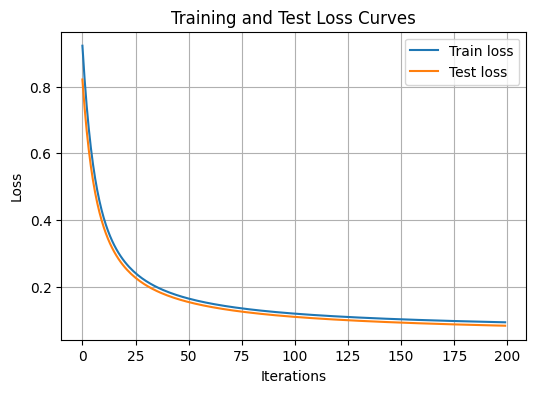

In [98]:
plot_loss_curves(epochs=n_iterations, train_loss_values=train_loss,
                    test_loss_values=test_loss)

In [99]:
model_0.state_dict()

OrderedDict([('weights',
              tensor([[ 2.2775],
                      [-2.2682],
                      [ 0.5807]], device='cuda:0')),
             ('bias', tensor([-0.0364], device='cuda:0'))])

In [101]:
model_0.eval()

with torch.inference_mode():
    y_test_pred = torch.squeeze(model_0.forward((X_test)) > 0.5) 
    

accuracy_fn(y_test, y_test_pred)

98.0